### basic steps

1. divide the dataset into independent and dependent features 
2. train , test split 
3. Standardize the dataset
4. Train the model 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('height-weight.csv')


In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

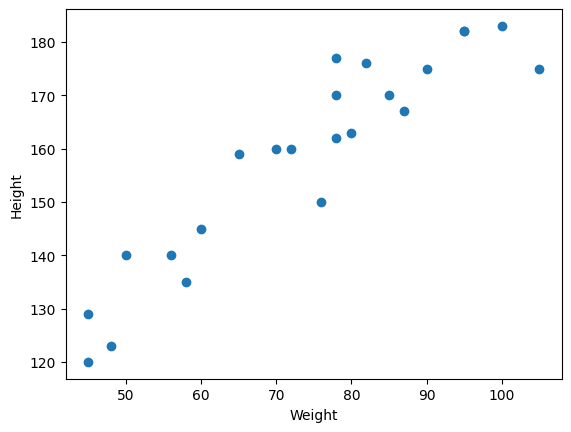

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [7]:
X = df[['Weight']] # independent feature
y = df['Height'] # dependent feature

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=42)

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [10]:
## Standardize the dataset (only independent features)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

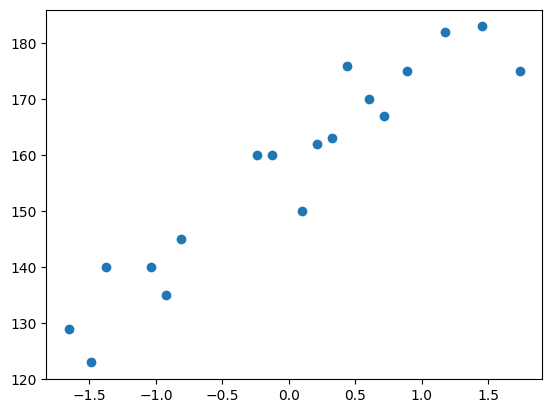

In [11]:
plt.scatter(X_train,y_train)
plt.show()

In [12]:
# Training a linear regression model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [13]:
regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
print("The slope or coefficeint of weight is ",regressor.coef_)
print("The intercepr : ", regressor.intercept_)

The slope or coefficeint of weight is  [17.03440872]
The intercepr :  157.5


1. formula : h_theta(x) = theta_0 + theta_1 * x1

2. result we got : theta_0 = 157.5, theta_1 = 17.03440872

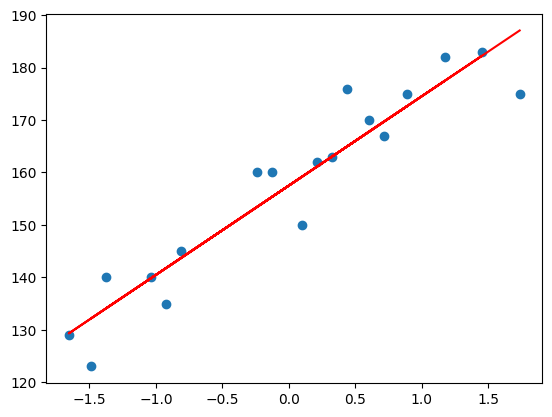

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [17]:
y_pred_test = regressor.predict(X_test)
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

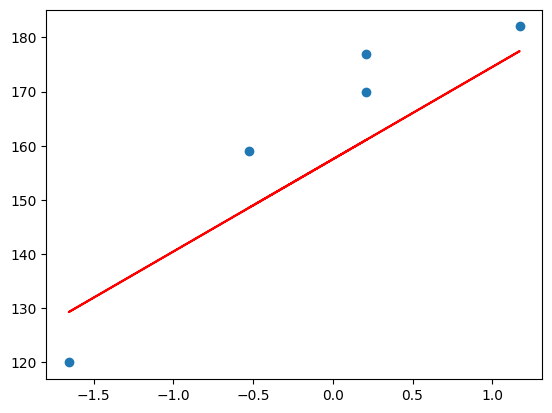

In [18]:
plt.scatter(X_test,y_test)
plt.plot(X_test, regressor.predict(X_test),'r')

# Performance Metrics

1. MSE
2. MAE
3. RMSE

R square and adjusted R square

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [20]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [22]:
score

0.776986986042344

# Adjusted R square error 

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [21]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [23]:
# new data point weight = 80

scaled_weight = scaler.transform([[80]])
scaled_weight

/home/toji339/Documents/Projects/Basic-Linear-Regression-Project/ml/lib64/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [27]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


# Assumptions - that we make to tell our model is working 

1. plot a scatter plot for prediction => plt.scatter(y_test, y_pred_test) => This scatter plot should be linear 

2. Residuals => if we plot the residuals with histplot with kde = True, it should be a gaussian distribution or normal distribution.

3. if we create a scatter plot between predictions and residuals it should be a uniform distribution 

with these three assumptions then we can say our model is working well.

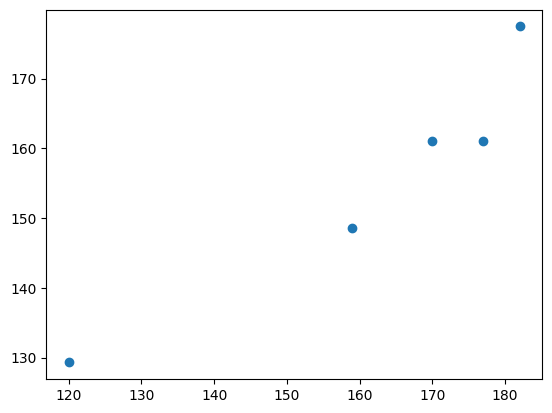

In [28]:
plt.scatter(y_test,y_pred_test)

In [29]:
## Residuals
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

/tmp/ipykernel_274603/2747191050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

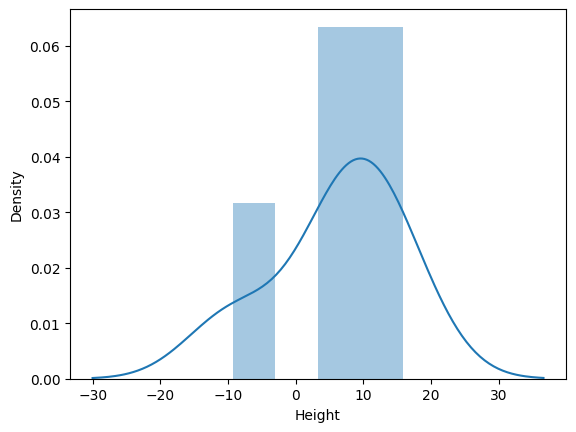

In [32]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)